In [1]:
import pandas as pd

In [2]:
dataset= pd.read_csv("accepted_2007_to_2018Q3.csv", encoding = "ISO-8859-1")

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,26,37,47,49,50,56,59,128,129,130,131,134,135,136,139,143,144,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Selecting Dataset

https://www.kaggle.com/wendykan/lending-club-loan-data

The data set I selected contains the accepted loans from Lending club from 2007 to 2018. As the largest peer to peer lending network I assume the data they provide paints a good picture of the lending industry. I think this dataset will be able to tell me what range of credit scores can get loans and what the average score is,how different metrics predict the score of a loan, and the average loan size for different purposes. 


In [3]:
dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,93999587.0,NaN,19200.0,19200.0,19200.0,36 months,13.99,656.12,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,96219354.0,NaN,7000.0,7000.0,7000.0,36 months,5.32,210.81,A,A1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,96309331.0,NaN,12000.0,12000.0,12000.0,36 months,16.99,427.78,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,96429334.0,NaN,6000.0,6000.0,6000.0,36 months,7.49,186.61,A,A4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,96229241.0,NaN,5000.0,5000.0,5000.0,36 months,10.49,162.49,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


The dataset has far too many columns and they do not all show up when displayed here. The key columns though are going to be loan amount, interest rate, the grade, income which will likely be floats or integers, and then other columns that may be useful for grouping like home ownership and the type of loan it is.

As I mentioned there are way too many columns in this data set and a lot of the information is superfluos so I am creating a new data frame that only contains the columns I beleive will be useful for my analysis. I am also removing any rows with missing values so that I don't run into any errors when trying to analyze data on an aggregate level.

In [4]:
revised_dataframe = dataset[['loan_amnt','int_rate','grade','home_ownership','annual_inc','issue_d','purpose','title','addr_state','dti','fico_range_low','fico_range_high','inq_last_6mths']]
#Creating a new data frame with only the columns I want in it

In [5]:
revised_dataframe.head()

,loan_amnt,int_rate,grade,home_ownership,annual_inc,issue_d,purpose,title,addr_state,dti,fico_range_low,fico_range_high,inq_last_6mths
0,19200.0,13.99,C,MORTGAGE,75000.0,Dec-16,home_improvement,Home improvement,WI,16.98,740.0,744.0,0.0
1,7000.0,5.32,A,RENT,85000.0,Dec-16,debt_consolidation,Debt consolidation,NY,12.80,705.0,709.0,0.0
2,12000.0,16.99,D,RENT,30000.0,Dec-16,credit_card,Credit card refinancing,WA,9.26,665.0,669.0,0.0
3,6000.0,7.49,A,RENT,60000.0,Dec-16,small_business,Business,GA,20.06,705.0,709.0,0.0
4,5000.0,10.49,B,RENT,75000.0,Dec-16,other,Other,NV,11.01,665.0,669.0,1.0


In [6]:
loan_df = revised_dataframe.dropna().reset_index(drop = True)

#Dropping the rows with missing values and reseting the index so that the rows are properly indexed
#so they can be called by their index later

In [7]:
loan_df.head()

,loan_amnt,int_rate,grade,home_ownership,annual_inc,issue_d,purpose,title,addr_state,dti,fico_range_low,fico_range_high,inq_last_6mths
0,19200.0,13.99,C,MORTGAGE,75000.0,Dec-16,home_improvement,Home improvement,WI,16.98,740.0,744.0,0.0
1,7000.0,5.32,A,RENT,85000.0,Dec-16,debt_consolidation,Debt consolidation,NY,12.80,705.0,709.0,0.0
2,12000.0,16.99,D,RENT,30000.0,Dec-16,credit_card,Credit card refinancing,WA,9.26,665.0,669.0,0.0
3,6000.0,7.49,A,RENT,60000.0,Dec-16,small_business,Business,GA,20.06,705.0,709.0,0.0
4,5000.0,10.49,B,RENT,75000.0,Dec-16,other,Other,NV,11.01,665.0,669.0,1.0


### Credit Scores and Loans

In [8]:
loan_df['fico_range_low'].min()

660.0

In [9]:
loan_df['fico_range_high'].max()

850.0

In [10]:
loan_df['approx_fico']= (loan_df['fico_range_low'] +  loan_df['fico_range_high']) /2

In [11]:
loan_df.head()

,loan_amnt,int_rate,grade,home_ownership,annual_inc,issue_d,purpose,title,addr_state,dti,fico_range_low,fico_range_high,inq_last_6mths,approx_fico
0,19200.0,13.99,C,MORTGAGE,75000.0,Dec-16,home_improvement,Home improvement,WI,16.98,740.0,744.0,0.0,742.0
1,7000.0,5.32,A,RENT,85000.0,Dec-16,debt_consolidation,Debt consolidation,NY,12.80,705.0,709.0,0.0,707.0
2,12000.0,16.99,D,RENT,30000.0,Dec-16,credit_card,Credit card refinancing,WA,9.26,665.0,669.0,0.0,667.0
3,6000.0,7.49,A,RENT,60000.0,Dec-16,small_business,Business,GA,20.06,705.0,709.0,0.0,707.0
4,5000.0,10.49,B,RENT,75000.0,Dec-16,other,Other,NV,11.01,665.0,669.0,1.0,667.0


In [12]:
loan_df['approx_fico'].mean()

697.2035540306689

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

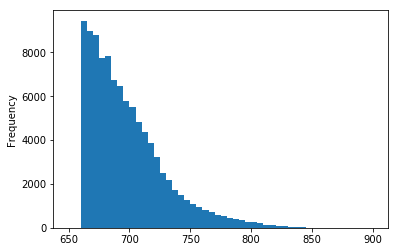

In [14]:
loan_df["approx_fico"].plot.hist(bins = 50 ,range = (650.0,900.0))

The range of credit scores that got approved for a loan was fairly broad with a range from 660 to 850 with an average fico score of about 697. The scores are also right skewed in there distribution, however this is due to merely the number of people who have a certain score decreases as the score increases. This suggests that above a certain threshold you are likely to get approved for your loan. However this raised the question if fico score was a good predictor of loan amount. 

In [15]:
loan_df[["approx_fico","loan_amnt"]].corr()

,approx_fico,loan_amnt
approx_fico,1.000000,0.083998
loan_amnt,0.083998,1.000000


After checking the correlation between fico and loan size I found that there is a weak but insignifigant correlation between credit score and the size of the loan. 

### Grading a Loan

In [23]:
grade_grouping = loan_df.groupby("grade").mean().reset_index()
grade_grouping

,grade,loan_amnt,int_rate,annual_inc,dti,fico_range_low,fico_range_high,inq_last_6mths,approx_fico
0,A,13129.508523,7.047661,100882.574805,16.318074,729.479847,733.480166,0.331926,731.480006
1,B,12571.926878,10.566014,82913.408951,17.840482,696.138566,700.138662,0.462304,698.138614
2,C,14185.556392,14.114784,78236.066851,19.161484,688.572251,692.572310,0.590709,690.572281
3,D,16047.488510,18.807110,71072.731775,20.607290,685.162508,689.162508,0.725542,687.162508
4,E,18017.364628,24.291665,69701.540799,21.587581,684.341644,688.341644,0.799377,686.341644
5,F,18912.754410,29.022531,66602.659233,22.209261,681.675712,685.675712,0.919946,683.675712
6,G,19563.956044,30.491890,67814.740923,22.832484,681.208791,685.208791,1.039560,683.208791


Looking at the averages for the different metrics there are clear trends for most metrics. The interest rate clearly gets higher as the grade gets worse which is fairly obvious because interest rates are likely assigned by grade. Also higher income meant a higher score and lower debt to income meant a better grade. One of the more interesting points was that the average number of inquiries in the last 6 months appears to be negtaively correlated with grade which validates the idea that checking your credit score too often is harmful

I also want to see what metric is the strongest predictor of grade so I am assigning a value to each grade so I can find the correlation.

In [36]:
i = 6
score = 0
while i >= 0:
    grade_grouping["grade_value"][i]= score
    i= i-1
    score = score + 1 
    

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [37]:
grade_grouping

,grade,loan_amnt,int_rate,annual_inc,dti,fico_range_low,fico_range_high,inq_last_6mths,approx_fico,grade_value
0,A,13129.508523,7.047661,100882.574805,16.318074,729.479847,733.480166,0.331926,731.480006,6
1,B,12571.926878,10.566014,82913.408951,17.840482,696.138566,700.138662,0.462304,698.138614,5
2,C,14185.556392,14.114784,78236.066851,19.161484,688.572251,692.572310,0.590709,690.572281,4
3,D,16047.488510,18.807110,71072.731775,20.607290,685.162508,689.162508,0.725542,687.162508,3
4,E,18017.364628,24.291665,69701.540799,21.587581,684.341644,688.341644,0.799377,686.341644,2
5,F,18912.754410,29.022531,66602.659233,22.209261,681.675712,685.675712,0.919946,683.675712,1
6,G,19563.956044,30.491890,67814.740923,22.832484,681.208791,685.208791,1.039560,683.208791,0


             annual_inc  grade_value
annual_inc     1.000000     0.890489
grade_value    0.890489     1.000000
                  dti  grade_value
dti          1.000000    -0.985525
grade_value -0.985525     1.000000
             approx_fico  grade_value
approx_fico     1.000000     0.801445
grade_value     0.801445     1.000000
                inq_last_6mths  grade_value
inq_last_6mths        1.000000    -0.998025
grade_value          -0.998025     1.000000


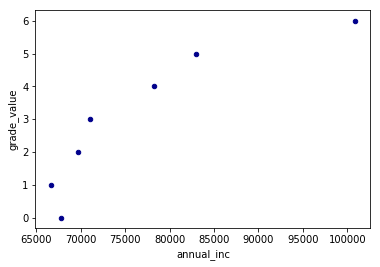

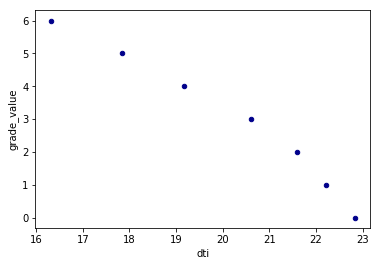

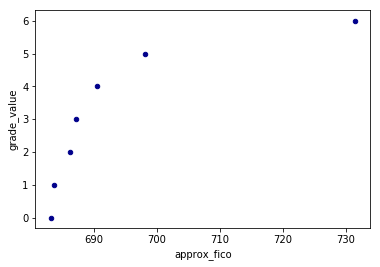

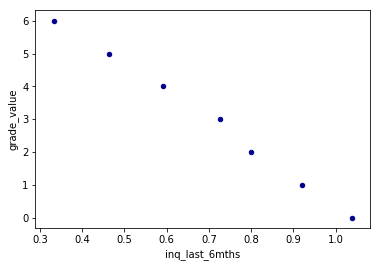

In [56]:
print(grade_grouping[["annual_inc","grade_value"]].corr())
grade_grouping.plot.scatter(x='annual_inc', y='grade_value', c='DarkBlue')
print(grade_grouping[["dti","grade_value"]].corr())
grade_grouping.plot.scatter(x='dti', y='grade_value', c='DarkBlue')
print(grade_grouping[["approx_fico","grade_value"]].corr())
grade_grouping.plot.scatter(x='approx_fico', y='grade_value', c='DarkBlue')
print(grade_grouping[["inq_last_6mths","grade_value"]].corr())
grade_grouping.plot.scatter(x='inq_last_6mths', y='grade_value', c='DarkBlue')



Each of the factor ended up having a very strong correlation with the grade given to the score. However, the most surprising to me was how inquiries had a nearly perfect negative correlation with the grade meaning its a very powerful predictor of how a loan will be graded. 

### Loans by Purpose

In [50]:
type_grouping = loan_df.groupby("purpose").mean().reset_index()

In [51]:
type_grouping

,purpose,loan_amnt,int_rate,annual_inc,dti,fico_range_low,fico_range_high,inq_last_6mths,approx_fico
0,car,8844.727435,12.701957,69368.977113,16.530751,701.456658,705.456658,0.486148,703.456658
1,credit_card,14295.822839,12.282415,81394.555525,18.961856,695.462674,699.462724,0.520754,697.462699
2,debt_consolidation,15272.213405,14.108865,79679.004022,19.411472,693.368545,697.368580,0.554266,695.368563
3,home_improvement,13690.737624,12.924250,96333.555312,16.846883,703.169962,707.170102,0.635395,705.170032
4,house,14701.644737,15.868618,81240.296667,16.629759,699.057018,703.057018,0.684211,701.057018
5,major_purchase,11289.776525,13.431090,82253.612335,16.112665,703.932749,707.933584,0.605681,705.933166
6,medical,8368.006374,13.008173,79739.121686,18.442344,695.902975,699.903683,0.549575,697.903329
7,moving,7384.458556,14.502660,67888.267594,17.818209,694.906417,698.906417,0.589572,696.906417
8,other,9136.769856,14.460324,74774.785146,17.548357,695.741000,699.741140,0.554419,697.741070
9,renewable_energy,9867.391304,14.283261,72069.967391,17.466957,697.663043,701.663043,0.619565,699.663043


In [52]:
type_grouping.loc[type_grouping["loan_amnt"].argmax()]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


purpose            wedding
loan_amnt            24000
int_rate             11.49
annual_inc          225000
dti                   8.56
fico_range_low         700
fico_range_high        704
inq_last_6mths           0
approx_fico            702
Name: 12, dtype: object

In [53]:
type_grouping.loc[type_grouping["loan_amnt"].argmin()]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  """Entry point for launching an IPython kernel.


purpose            vacation
loan_amnt           6038.87
int_rate            12.4125
annual_inc          67467.8
dti                 18.2842
fico_range_low      698.843
fico_range_high     702.843
inq_last_6mths     0.609453
approx_fico         700.843
Name: 11, dtype: object

When examining the data by the the purpose of the loan there are some interesting findings. The highest loan amount on average was for weddings. This surprised me because I would have expected the loans for things like cars and homes to be higher. Despite this the average interest rate for weddings was the lowest although the range for these was not particularly big.

In [58]:
loan_df.to_excel('loans.xlsx', index= False)

In [67]:
loan_df.to_csv(r'exported_loans.csv')